<div style="background-color:#DBEDF3; padding:20px; font-size:15px">

**🗺️Objective:**
    
The objective of this project is to perform market segmentation analysis for McDonald's customers based on their perceptions and preferences. Using a dataset containing responses from McDonald's customers, we aim to identify distinct segments within the customer base and understand the characteristics and preferences of each segment. Specifically, we will analyze the following aspects:

**1. Perceptions and Preferences:** Investigate how customers perceive various aspects of McDonald's products and services, including factors such as taste, convenience, healthiness, pricing, and overall satisfaction.

**2. Demographic Analysis:** Explore the demographic characteristics of McDonald's customers, including age, gender, and visit frequency. Determine if there are any demographic patterns or trends within different segments.

**3. Market Segmentation:** Utilize advanced clustering techniques to segment McDonald's customers based on their responses and characteristics. Identify homogeneous groups of customers with similar preferences and behaviors.

**4. Segment Profiling:** Profile each segment to understand their unique preferences, attitudes, and behaviors towards McDonald's. Determine key drivers of satisfaction and loyalty within each segment.

**5. Strategic Insights:** Provide actionable insights and recommendations to McDonald's management based on the segmentation analysis. Suggest targeted marketing strategies, product offerings, and service improvements to better cater to the needs of each segment and enhance overall customer satisfaction and loyalty.

By achieving these objectives, we aim to provide McDonald's with valuable insights into their customer base, enabling them to tailor their marketing efforts and operational strategies to meet the diverse needs and preferences of different customer segments effectively. Ultimately, this analysis will contribute to improving customer satisfaction, driving repeat business, and maximizing long-term profitability for McDonald's.

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
    
|       | **Attribute** | **Information** |
| :---  |     :---      |       :---      |      
| **1** | **yummy** | Indicates whether the respondent finds McDonald's food tasty. Possible values: 'No', 'Yes' |                
| **2** | **convenient** | Indicates whether the respondent finds McDonald's convenient. Possible values: 'Yes', 'No' |                        
| **3** | **spicy** | Indicates whether the respondent likes spicy food at McDonald's. Possible values: 'No', 'Yes' |
| **4** | **fattening** | Indicates whether the respondent thinks McDonald's food is fattening. Possible values: 'Yes', 'No' |
| **5** | **greasy** | Indicates whether the respondent finds McDonald's food greasy. Possible values: 'No', 'Yes' |
| **6** | **fast** | Indicates whether the respondent thinks McDonald's service is fast. Possible values: 'Yes', 'No' |  
| **7** | **cheap** | Indicates whether the respondent thinks McDonald's food is cheap. Possible values: 'Yes', 'No' |
| **8** | **tasty** | Indicates whether the respondent finds McDonald's food tasty. Possible values: 'No', 'Yes' |                      
| **9** | **expensive** | Indicates whether the respondent thinks McDonald's food is expensive. Possible values: 'Yes', 'No' |
| **10** | **healthy** | Indicates whether the respondent thinks McDonald's food is healthy. Possible values: 'No', 'Yes' |
| **11** | **disgusting** | Indicates whether the respondent finds McDonald's food disgusting. Possible values: 'No', 'Yes' |                     
| **12** | **Like** | Respondent's overall sentiment towards McDonald's. Possible values: '-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3', '0', '-4', '-1' |
| **13** | **VisitFrequency** | Frequency of visits to McDonald's. Possible values: 'Every three months', 'Once a week', 'Once a month', 'Once a year', 'More than once a week', 'Never' |
| **14** | **Gender** | Gender of the respondent. Possible values: 'Female', 'Male' |


<a id="1"></a>
# <p style="padding:15px;background-color:#90EE90;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">1. Import Libraries</p>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from collections import Counter
from kneed import KneeLocator
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

print("Libraries imported successfully.")

Libraries imported successfully.


- Pandas: Used for data manipulation and analysis.
- NumPy: Essential for numerical computations.
- Matplotlib: For creating visualizations.
- Seaborn: Provides a high-level interface for drawing attractive and informative statistical graphics.
- Scikit-learn: Utilized for machine learning algorithms such as clustering (KMeans), preprocessing, and evaluation metrics.
- Statsmodels: Used for statistical models and tests, including mosaic plots.
- Collections: Used for counting elements in the data.

<a id="1"></a>
# <p style="padding:15px;background-color:#90EE90;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">2. Reading and Understanding the Dataset</p>

<a id="1"></a>  
#### <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">2.1. Import Dataset</p>

In [4]:
Data=pd.read_csv("/content/mcdonalds.csv")

In [5]:
# Preview the dataset
df = pd.DataFrame(Data)
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


<a id="1"></a>  
#### <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">2.2. Discover Data</p>

In [6]:
# View dimensions of dataset
rows, col = df.shape
print ("Dimensions of dataset: {}" . format (df.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (1453, 15)
Rows: 1453 
Columns: 15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [9]:
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">    
    <strong>📝The information of data:</strong>
    <br>
    
- The **Age** data type is classified as an **int64**. The remaining data types are represented as **object** .Data has no NULL values.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1453.0,44.604955,14.221178,18.0,33.0,45.0,57.0,71.0


<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">    
    <strong>📝The table above shows:</strong>
    <br>
    
- 	The table summarizes descriptive statistics for the variable "Age" with 1453 observations. The mean age is 44.60 years, with a standard deviation of 14.22 years. Ages range from 18 to 71 years,with quartile values at 25% (Q1 = 33 years), 50% (median = 45 years), and 75% (Q3 = 57 years).

In [11]:
df.describe(include="object")

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,439,788


<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">  

-  The table provides information on various attributes such as food characteristics, preferences, visit frequency, and gender. Each attribute has 1453 observations. For categorical variables like "yummy" and "convenient," there are two unique categories(Yes or No). The most frequent responses include "Yes" for yummy (803 customers), tasty (936 ) and convenient (1319). Other details include preferences like spicy and fatty, visit frequency (e.g., once a month-439), and gender (e.g., Female-788).

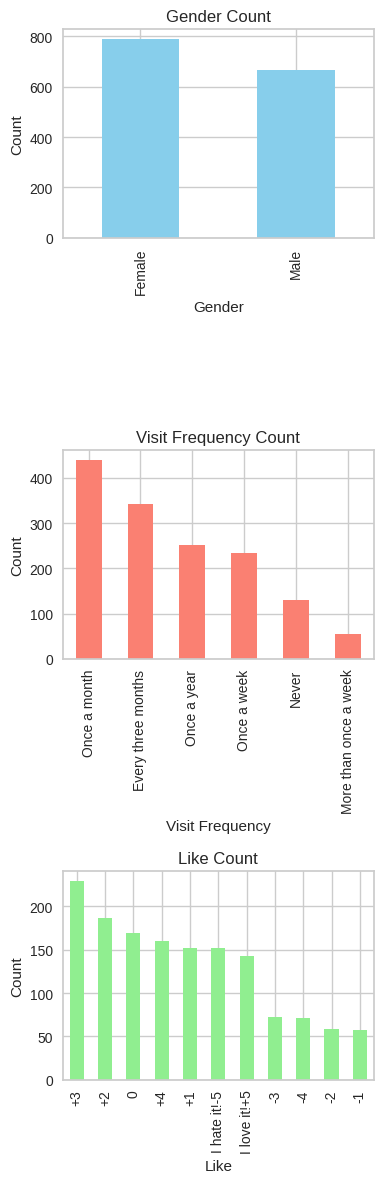

In [12]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(4, 12))

# Plot Gender count
df['Gender'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Gender Count')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plot VisitFrequency count
df['VisitFrequency'].value_counts().plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Visit Frequency Count')
axes[1].set_xlabel('Visit Frequency')
axes[1].set_ylabel('Count')

# Plot Like count
df['Like'].value_counts().plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Like Count')
axes[2].set_xlabel('Like')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

<a id="1"></a>
# <p style="padding:15px;background-color:#90EE90;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">3. Explore and Preprocess Data:</p>

In [13]:
first_11 = df.columns[:11]  # Assuming the first 11 columns are categorical attributes
x = df.loc[:, first_11]
x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


<a id="1"></a>  
#### <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200"> 3.1. Determine the types of values present in categorical columns</p>

In [14]:
# list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("List of categorical columns:")
print(categorical_columns)


List of categorical columns:
['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'VisitFrequency', 'Gender']


In [15]:
# Iterate over each categorical column
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f" '{column}': {unique_values}")


 'yummy': ['No' 'Yes']
 'convenient': ['Yes' 'No']
 'spicy': ['No' 'Yes']
 'fattening': ['Yes' 'No']
 'greasy': ['No' 'Yes']
 'fast': ['Yes' 'No']
 'cheap': ['Yes' 'No']
 'tasty': ['No' 'Yes']
 'expensive': ['Yes' 'No']
 'healthy': ['No' 'Yes']
 'disgusting': ['No' 'Yes']
 'Like': ['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
 'VisitFrequency': ['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
 'Gender': ['Female' 'Male']


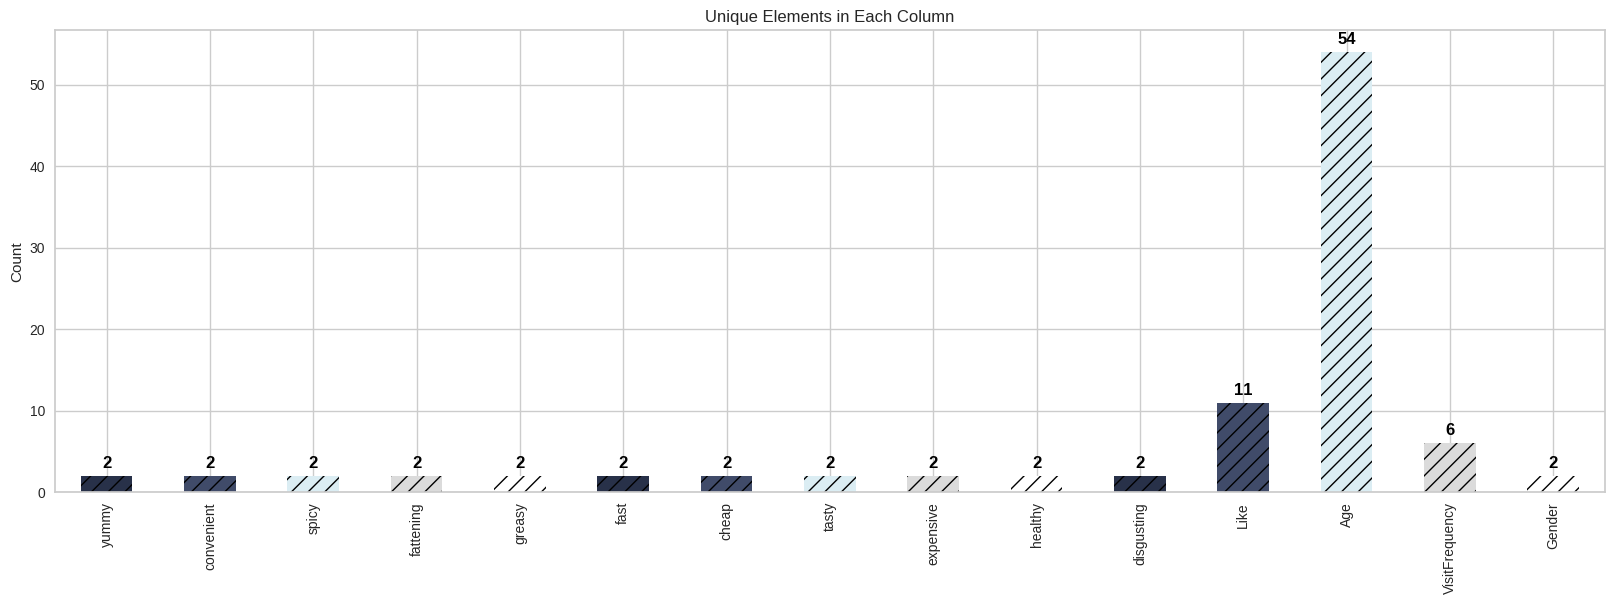

In [16]:
colors = ["#283149", "#404B69", "#DBEDF3", "#DBDBDB", "#FFFFFF"]
# Plot the unique values
unique = df.nunique()
plt.figure(figsize=(20, 6))
unique.plot(kind='bar', color=colors, hatch='//')
plt.title('Unique Elements in Each Column')
plt.ylabel('Count')
for i, v in enumerate(unique.values):
    plt.text(i, v+1, str(v), color='black', fontweight='bold', ha='center')
plt.show()

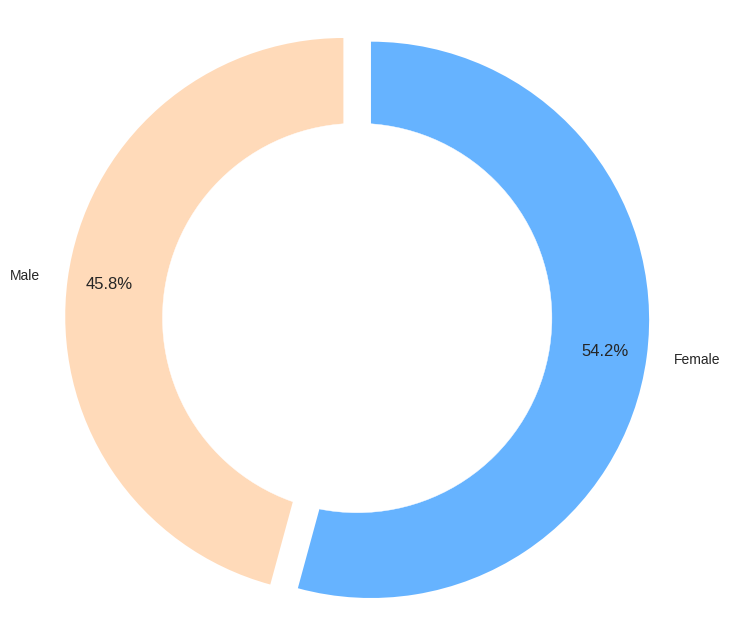

In [17]:
# Define labels and sizes based on the DataFrame
labels = ['Male', 'Female']
sizes = [df[df['Gender'] == 'Male']['Gender'].count(), df[df['Gender'] == 'Female']['Gender'].count()]

# Define colors and explode
colors = ['#ffdaB9', '#66b3ff']
explode = (0.05, 0.05)

# Create the pie chart
plt.figure(figsize=(8, 8))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
plt.axis('equal')
plt.gca().add_artist(my_circle)

# Show the plot
plt.show()


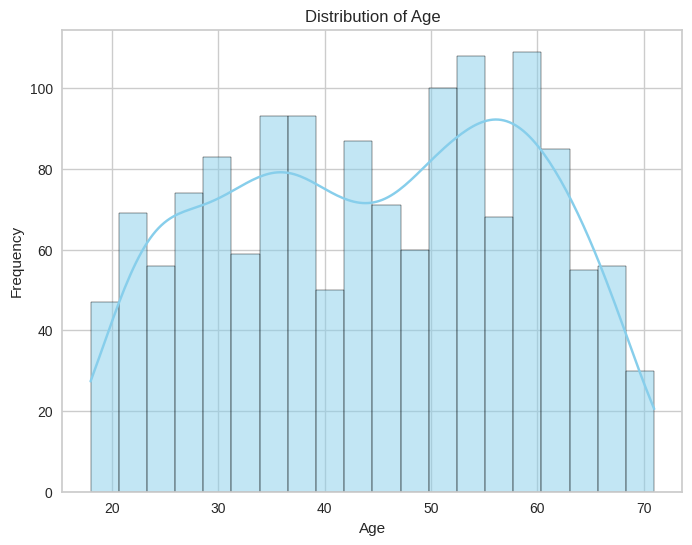

In [18]:
# Plot histogram for the 'Age' column
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


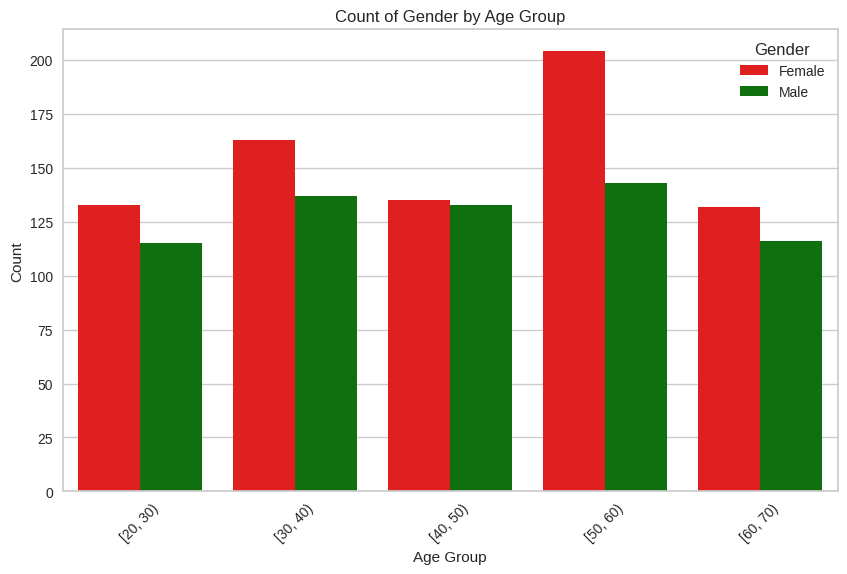

In [20]:
# Create age groups
df['Age_Group'] = pd.cut(df['Age'], bins=range(20, 71, 10), right=False)

# Plot count of gender by age groups
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_Group', hue='Gender', palette={'Male': 'green', 'Female': 'red'})
plt.title('Count of Gender by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [21]:
df.shape # Age group columnadded

(1453, 16)

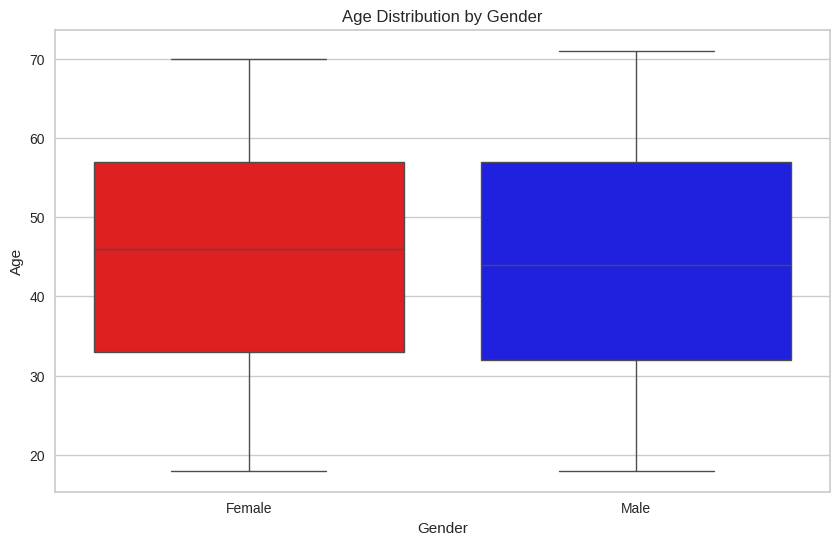

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Age',hue='Gender', palette={'Male': 'blue', 'Female': 'red'})
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


<a id="1"></a>  
#### <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200"> 3.2. Convert Perception Terms </p>

In [24]:
x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [25]:
def perception_to_numeric(value):
    if value.lower() == 'yes':
        return 1
    elif value.lower() == 'no':
        return 0
    else:
        return None  # Handling unknown values

perception_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                      'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
for column in perception_columns:
    x[column] = x[column].apply(perception_to_numeric)

In [26]:
x.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int64
 1   convenient  1453 non-null   int64
 2   spicy       1453 non-null   int64
 3   fattening   1453 non-null   int64
 4   greasy      1453 non-null   int64
 5   fast        1453 non-null   int64
 6   cheap       1453 non-null   int64
 7   tasty       1453 non-null   int64
 8   expensive   1453 non-null   int64
 9   healthy     1453 non-null   int64
 10  disgusting  1453 non-null   int64
dtypes: int64(11)
memory usage: 125.0 KB


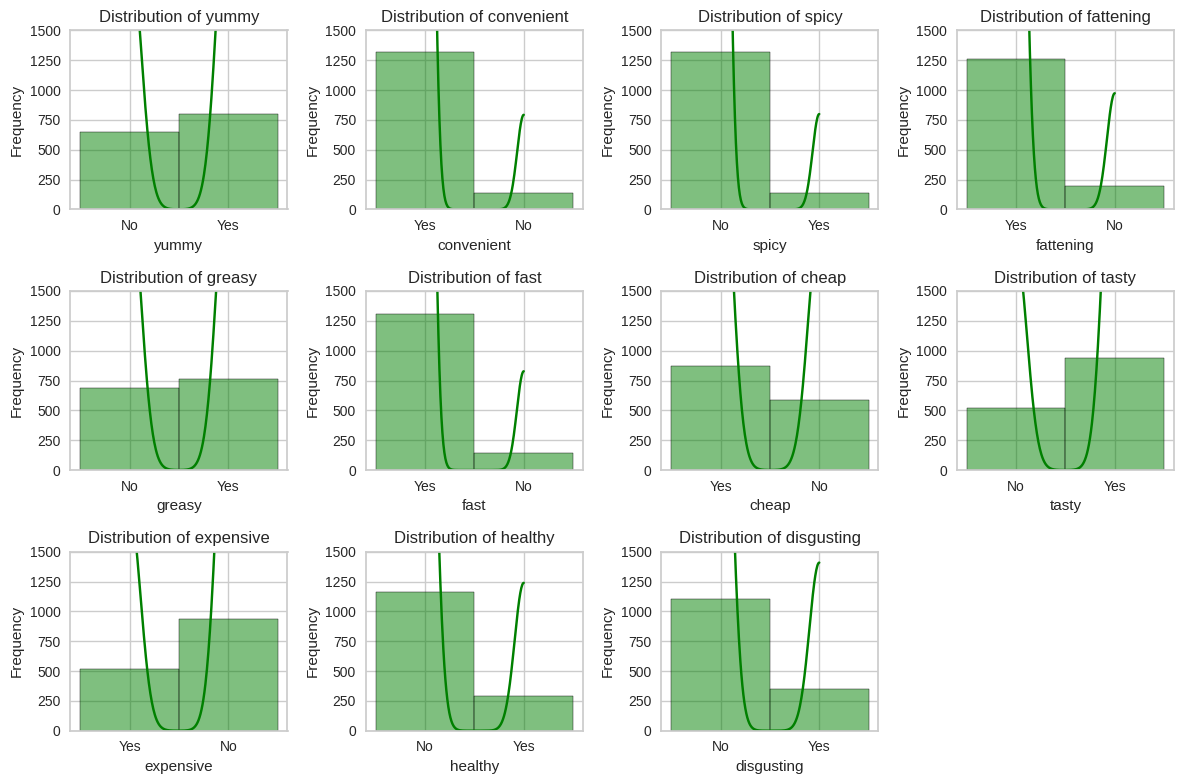

In [28]:
# Select numerical columns
numerical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
                     'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Plot histograms for numerical variables
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=20, kde=True, color='green')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.ylim(0,1500)
    plt.xticks([0, 1])  # 0 -no, 1- yes

plt.tight_layout()
plt.show()


In [29]:
columns=['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']
for column in columns:
  print(x[column].value_counts())
  print("-"*30)


yummy
1    803
0    650
Name: count, dtype: int64
------------------------------
convenient
1    1319
0     134
Name: count, dtype: int64
------------------------------
spicy
0    1317
1     136
Name: count, dtype: int64
------------------------------
fattening
1    1260
0     193
Name: count, dtype: int64
------------------------------
greasy
1    765
0    688
Name: count, dtype: int64
------------------------------
fast
1    1308
0     145
Name: count, dtype: int64
------------------------------
cheap
1    870
0    583
Name: count, dtype: int64
------------------------------
tasty
1    936
0    517
Name: count, dtype: int64
------------------------------
expensive
0    933
1    520
Name: count, dtype: int64
------------------------------
healthy
0    1164
1     289
Name: count, dtype: int64
------------------------------
disgusting
0    1100
1     353
Name: count, dtype: int64
------------------------------


<a id="1"></a>  
#### <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">3.3.Encode Categorical Variables</p>

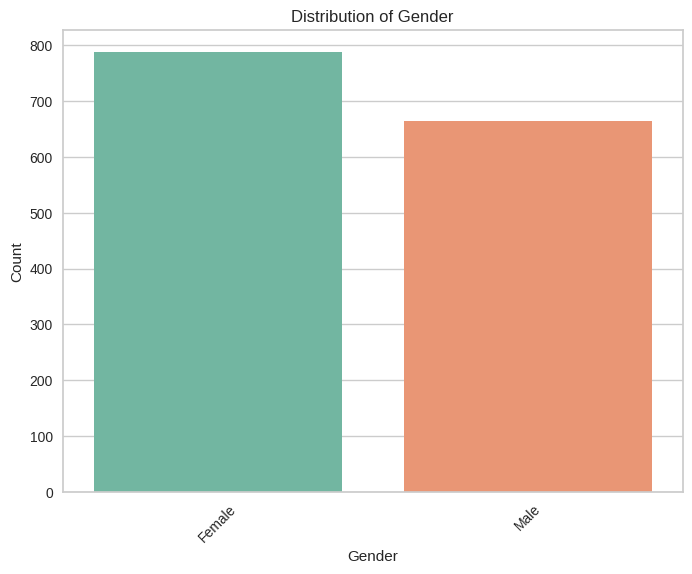

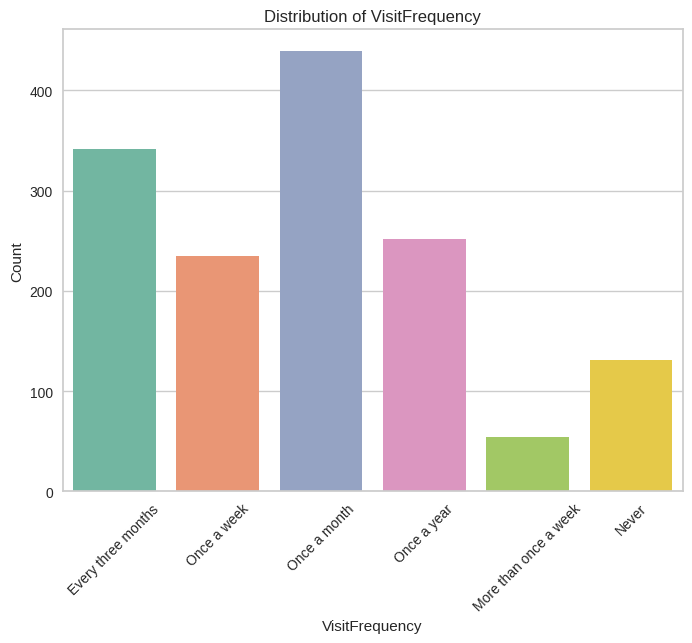

In [30]:
# Plot value counts or bar plots for categorical variables
categorical_columns = ['Gender', 'VisitFrequency']  # Add other categorical columns if needed
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, hue=column, palette='Set2', legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [31]:
encoder = LabelEncoder()
x['Gender'] = encoder.fit_transform(df['Gender'])
x['VisitFrequency'] = encoder.fit_transform(df['VisitFrequency'])

In [32]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1453 non-null   int64
 1   convenient      1453 non-null   int64
 2   spicy           1453 non-null   int64
 3   fattening       1453 non-null   int64
 4   greasy          1453 non-null   int64
 5   fast            1453 non-null   int64
 6   cheap           1453 non-null   int64
 7   tasty           1453 non-null   int64
 8   expensive       1453 non-null   int64
 9   healthy         1453 non-null   int64
 10  disgusting      1453 non-null   int64
 11  Gender          1453 non-null   int64
 12  VisitFrequency  1453 non-null   int64
dtypes: int64(13)
memory usage: 147.7 KB


In [33]:
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
unique_like_values = df['Like'].unique()
print("Unique values in the 'Like' column after processing:")
print(unique_like_values)

Unique values in the 'Like' column after processing:
['-3' '+2' '+1' '+4' '+5' '-5' '-2' '+3' '0' '-4' '-1']


In [34]:
x.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Gender            0
VisitFrequency    0
dtype: int64

<a id="1"></a>
# <p style="padding:15px;background-color:#90EE90;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">4. Dimensionality Reduction</p>

In [35]:
x.shape[1]

13

In [37]:
x_pca_df=x.drop(['Gender','VisitFrequency'], axis=1)
corr=x_pca_df.corr()

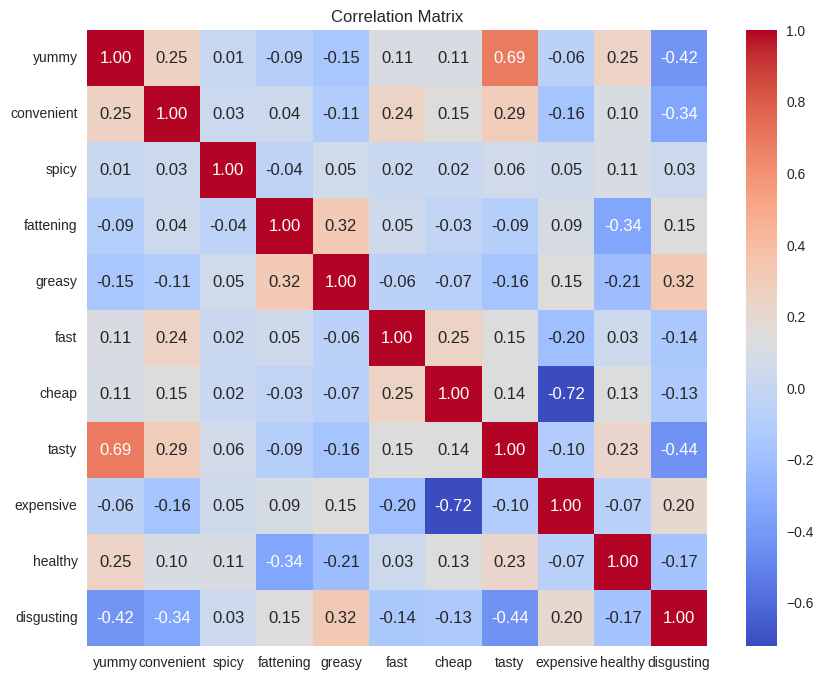

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

<a id="1"></a>  
#### <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">  Principal Component Analysis (PCA) </p>

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">

📌**Principal Component Analysis (PCA)** is a technique used to reduce the dimensions of a dataset while minimizing information loss. It does this by combining information from all variables into Principal Components (PCs) that are uncorrelated with each other. <blockquote>For example, a dataset with 10 variables will yield 10 PCs, each of which aims to summarize the information contained in the original variables while minimizing redundancy or correlation.<blockquote>
    
- PCA allows us to reduce the number of dimensions while retaining as much information as possible. We can choose to discard some of the PCs and use the remaining ones as our variables. This results in a dataset with fewer dimensions, but without any significant loss of information. Additionally, the new variables created through PCA are uncorrelated, which can be useful for downstream analysis.
-----    
- Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

In [39]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_pca_df)

# Fit PCA and compute explained variance ratio
pca = PCA()
pca.fit(X_scaled)

# Transform the data to its principal components
X_pca = pca.transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance_ratio = explained_variance_ratio.cumsum()


# Print explained variance ratio for each component
print("Explained Variance Ratio for each component:")
print(explained_variance_ratio)
print("="*60)
# Print cumulative explained variance
print("Cumulative Explained Variance:")
print(cumulative_variance_ratio)

Explained Variance Ratio for each component:
[0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]
Cumulative Explained Variance:
[0.25556637 0.40391399 0.52938308 0.62765279 0.71113635 0.78222737
 0.84721295 0.90105773 0.94868581 0.9766496  1.        ]


<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">



- The explained variance ratio for each component indicates the proportion of the dataset's variance explained by each principal component in PCA.
- The cumulative explained variance represents the total variance explained by all components up to a given component.


In [40]:
# Print the explained variance of each principal component
explained_variances = pca.explained_variance_
print("Explained variance of each principal component:", explained_variances)
print("="*100)
# Print the total variance explained by all the principal components
total_variance = explained_variances.sum()
print("Total variance explained by all principal components:", total_variance)

Explained variance of each principal component: [2.81316617 1.6329477  1.38111047 1.08171127 0.91895162 0.78253978
 0.71533376 0.59270042 0.52426978 0.3078135  0.25703129]
Total variance explained by all principal components: 11.007575757575758


<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">

**📝Explenations:**

- In general, the goal of PCA is to select the top few principal components that explain most of the variance in the data. In this case, we can see that the first principal component explains a amount of variance (2.81580897), while the later components explain progressively less. The cumulative sum of the explained variances can be used to determine how many components to select for a given level of retained variance.

In [41]:
# Calculate percentage variation
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

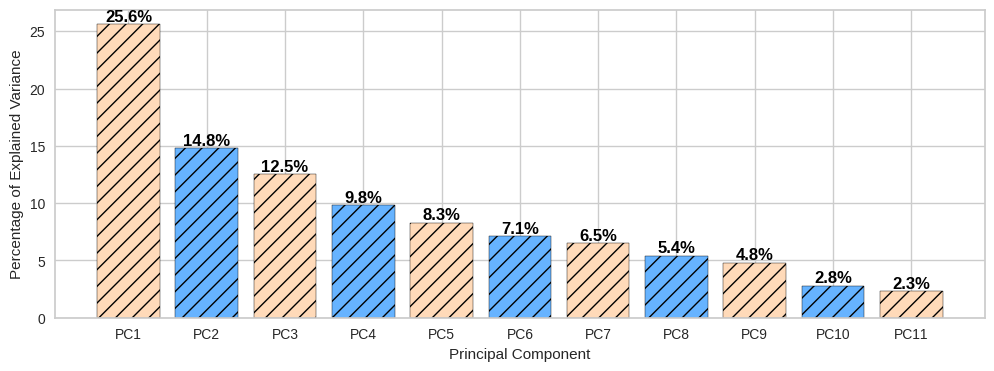

In [42]:
# Variance explained by each dimension
fig, ax = plt.subplots(figsize=(12, 4))
bars = ax.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels, color=colors, edgecolor='black', hatch='//')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
            f'{per_var[i]}%', ha='center', va='bottom', color='black', fontweight='bold')
plt.show()

In [43]:
num_components = np.argmax(cumulative_variance_ratio >= 0.90) + 1
print("Number of components needed to explain at least 90% of the variance:", num_components)

Number of components needed to explain at least 90% of the variance: 8


<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">

**📝Information:**

- In this case, the first component explains 25.6% of the variance, while the first three components combined explain 52.94%.
---
- We can keep around **90%** of the information from our data by using **8 dimensions**. This mean that we can actually reduce the number of features on our dataset from **11 to 8 numeric features**.

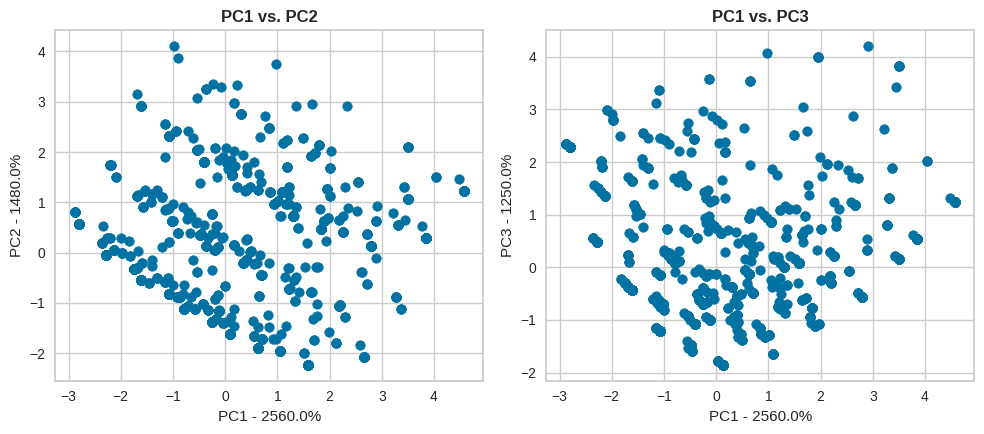

In [44]:
# plot pca
fig, axs = plt.subplots(1, 2, figsize=(10, 4.5))

# plot PCA1 vs PCA2
axs[0].scatter(X_pca[:,0], X_pca[:,1])
axs[0].set_title('PC1 vs. PC2', fontweight='bold')
axs[0].set_xlabel('PC1 - {0:.1f}%'.format(per_var[0]*100))
axs[0].set_ylabel('PC2 - {0:.1f}%'.format(per_var[1]*100))

# plot PCA1 vs PCA3
axs[1].scatter(X_pca[:,0], X_pca[:,2])
axs[1].set_title('PC1 vs. PC3', fontweight='bold')
axs[1].set_xlabel('PC1 - {0:.1f}%'.format(per_var[0]*100))
axs[1].set_ylabel('PC3 - {0:.1f}%'.format(per_var[2]*100))

# adjust the layout and show the figure
plt.tight_layout()
plt.show()

In [45]:
#Principal Component Data Decomposition
colnames = list(x_pca_df.columns)
pca_df = pd.DataFrame({
    'Features':colnames,
    'PC1':pca.components_[0], 'PC2':pca.components_[1], 'PC3':pca.components_[2], 'PC4':pca.components_[3],
    'PC5':pca.components_[4], 'PC6':pca.components_[5], 'PC7':pca.components_[6], 'PC8':pca.components_[7],
    'PC9':pca.components_[8], 'PC10':pca.components_[9], 'PC11':pca.components_[10]})

pca_df

,Features,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
1,convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
2,spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
3,fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
4,greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
5,fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
6,cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
7,tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
8,expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614
9,healthy,-0.266839,0.201031,0.367814,0.301990,0.051787,-0.446166,-0.449446,-0.446110,0.219269,-0.054544,-0.089903


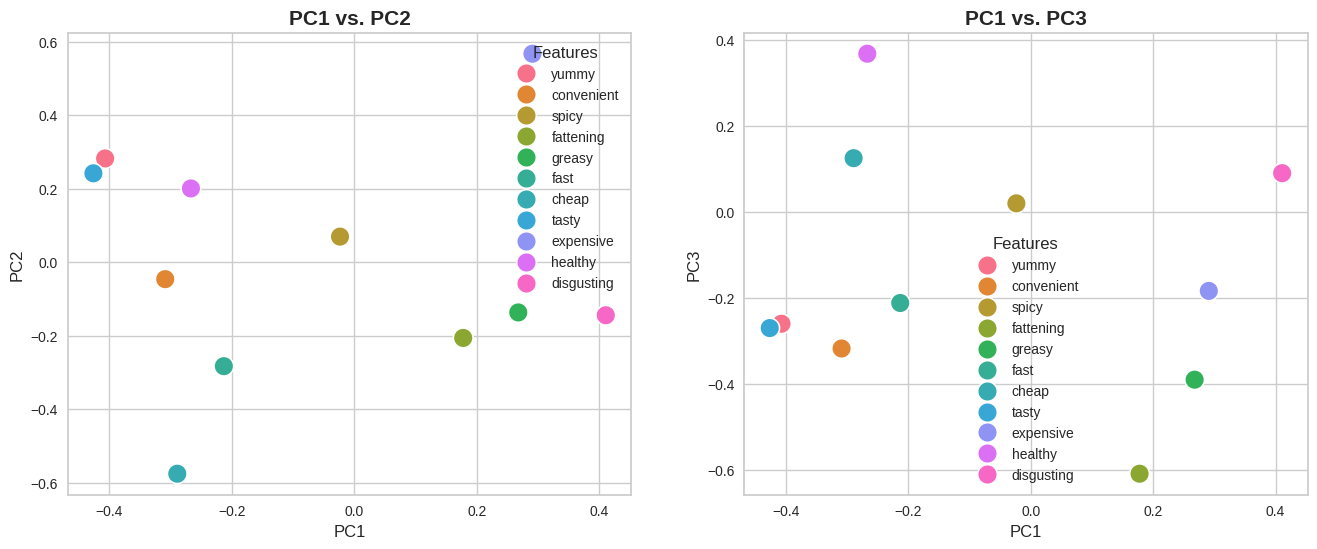

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Features', marker='o', s=200, ax=axs[0])
axs[0].set_title('PC1 vs. PC2', fontweight='bold', fontsize=15)
axs[0].set_xlabel('PC1', fontsize=12)
axs[0].set_ylabel('PC2', fontsize=12)

sns.scatterplot(data=pca_df, x='PC1', y='PC3', hue='Features', marker='o', s=200, ax=axs[1])
axs[1].set_title('PC1 vs. PC3', fontweight='bold', fontsize=15)
axs[1].set_xlabel('PC1', fontsize=12)
axs[1].set_ylabel('PC3', fontsize=12)

plt.show()


In [47]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = x_pca_df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.406955,0.282615,-0.259588,0.026237,0.346857,-0.124916,0.159878,0.016587,-0.195341,0.691446,-0.091851
convenient,-0.308827,-0.045682,-0.317151,-0.009424,-0.437148,0.188966,-0.661814,0.150033,-0.336539,0.028831,0.021460
spicy,-0.023320,0.069982,0.020170,0.845496,-0.185551,0.438661,0.214188,-0.027835,0.025239,0.058187,-0.041960
fattening,0.177861,-0.205590,-0.608077,-0.023396,0.086934,0.107520,-0.023851,-0.720478,0.105052,-0.020311,-0.074626
greasy,0.267796,-0.136300,-0.389568,0.330854,0.343713,-0.278329,-0.307300,0.487275,0.346137,-0.015160,-0.031047
fast,-0.213039,-0.282441,-0.211395,0.090363,-0.568939,-0.572734,0.392436,0.055976,0.099235,0.017917,-0.054448
cheap,-0.289134,-0.575032,0.125157,0.114477,0.256981,0.020657,-0.008895,-0.064667,-0.062027,0.060323,0.691923
tasty,-0.426115,0.242199,-0.269648,0.072691,0.286099,-0.053053,0.197364,0.059289,-0.213587,-0.713426,0.006426
expensive,0.290944,0.567528,-0.183298,0.035510,-0.207362,-0.171160,0.015198,-0.061727,-0.009675,0.029581,0.693614


<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">
Loadings are the coefficients of the linear combinations that define each principal component. For each original variable, there is a corresponding loading for each PC. The loadings indicate the direction and strength of the relationship between the original variables and the PCs. Higher absolute values of loadings indicate a stronger relationship between the variable and the PC.

In [48]:
# Initialize PCA with 8 components
pca = PCA(n_components=8)

# Fit PCA to your data
pca.fit(x_pca_df)

# Transform the data onto the new reduced dimension space
X_pca = pca.transform(x_pca_df)

names = ['Pc1', 'Pc2', 'Pc3', 'Pc4', 'Pc5', 'Pc6', 'Pc7', 'Pc8']
pf = pd.DataFrame(data = X_pca, columns = names)
print('\nFinal PCA:')
pf


Final PCA:


,Pc1,Pc2,Pc3,Pc4,Pc5,Pc6,Pc7,Pc8
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758
...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374


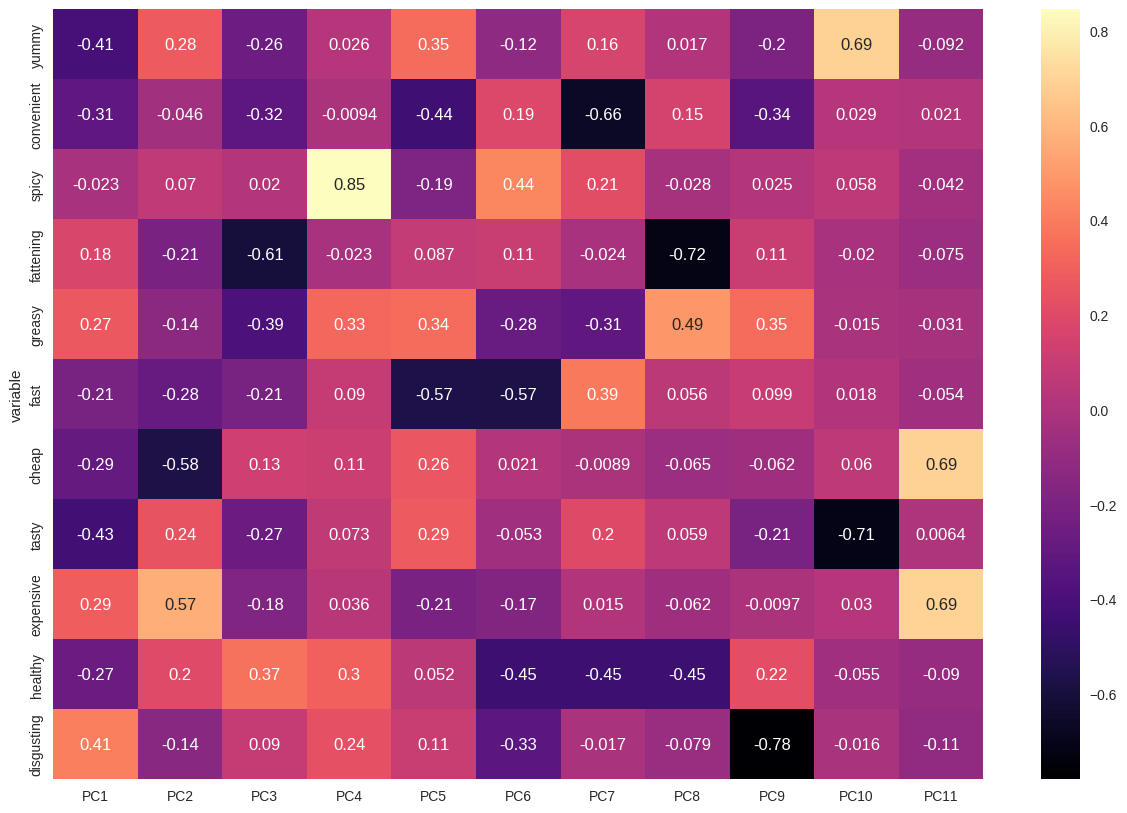

In [49]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (15,10)
ax = sns.heatmap(loadings_df, annot=True, cmap='magma')
plt.show()

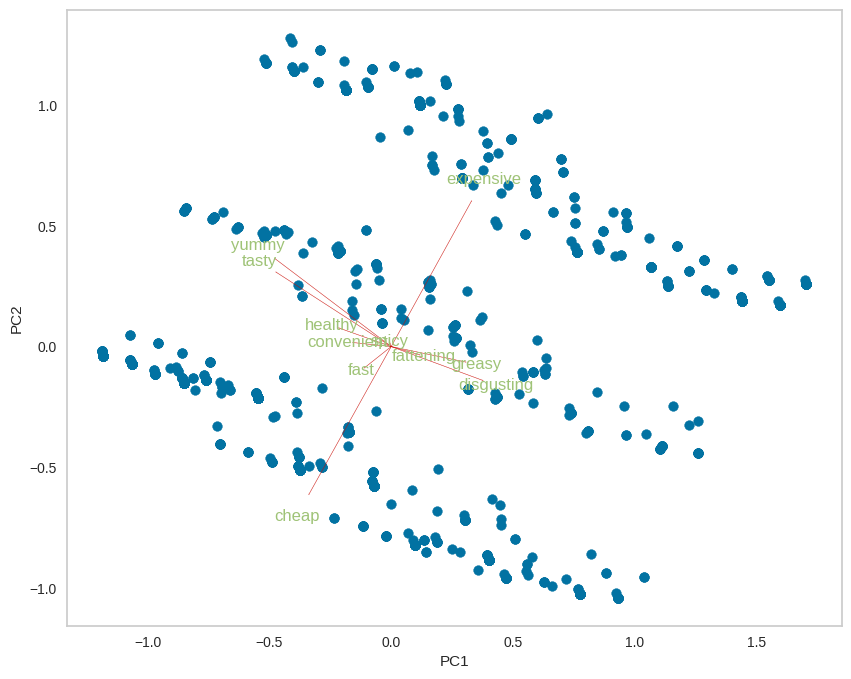

In [50]:
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(score[:,0], score[:,1], color='b') # plot scores on PC1 and PC2
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.5)
        if labels is not None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

pca.fit(x_pca_df)
score = pca.transform(x_pca_df)
coeff = pca.components_.T

# Call the biplot function
biplot(score, coeff, labels=x_pca_df.columns)
plt.show()


<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">

-  A biplot is a type of scatterplot that combines information about both observations and variables in a PCA.
-  In a biplot, the observations (data points) are plotted in the space defined by the principal components, and the original variables are represented as vectors originating from the origin of the plot.
- The direction and length of each vector represent the correlation (loadings) of the variable with the principal components.
- Biplots provide insights into the relationships between observations and variables in a low-dimensional space.

In [51]:
# Print the percentage of variance explained by each PC
for i, explained_var in enumerate(explained_variance_ratio):
    print(f"PC{i + 1}: {explained_var * 100:.2f}%")

PC1: 25.56%
PC2: 14.83%
PC3: 12.55%
PC4: 9.83%
PC5: 8.35%
PC6: 7.11%
PC7: 6.50%
PC8: 5.38%
PC9: 4.76%
PC10: 2.80%
PC11: 2.34%


<a id="1"></a>
# <p style="padding:15px;background-color:#90EE90;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">5.Extracting Segments</p>

<a id="1"></a>  
#### <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">   k-means Clustering</p>

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">

📌**k-means Clustering** is a popular unsupervised machine learning algorithm used to identify patterns and structure in data. It works by grouping similar data points together into clusters based on their distance from one another.

The algorithm is particularly well-suited for datasets with continuous numerical features, as it calculates distances between data points in n-dimensional space. However, it does not support categorical features, as it relies on numeric distances to measure similarity.

<blockquote>
    
- To start the algorithm, k centroids are chosen randomly, where k is the number of desired clusters. The distances between each data point and the centroids are then calculated, and each data point is assigned to the nearest centroid.
---
- Once all data points have been assigned to a centroid, the average value of the data points within each cluster is calculated, and these average values are defined as the new centroids. The process repeats itself until both centroids converge to fixed points, at which point the algorithm terminates.

<blockquote>    
    
- One of the main benefits of K-Means Clustering is its simplicity and speed, as it can handle large datasets and converge quickly. However, the algorithm is sensitive to initial centroid placement and can be prone to getting stuck in local optima, so multiple runs with different initial centroids are often used to improve results.
---
- K-Means Clustering has a wide range of applications, such as customer segmentation, image segmentation, and anomaly detection, and it is a valuable tool for exploratory data analysis and data preprocessing.

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">

📌The **elbow method** is a popular technique for determining the optimal number of clusters in a clustering algorithm. It involves plotting the within-cluster sum of squares against the number of clusters and identifying the "elbow" point where the rate of decrease in the sum of squares slows down.

In [52]:
# Set the parameters for the KMeans algorithm
kmeans_params = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 1,
                 "tol": 1e-4, "algorithm": "auto", "verbose": 0}

# Perform KMeans clustering for different values of k and store the inertia values
inertia_values = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, **kmeans_params)
    kmeans.fit(x_pca_df)
    inertia_values.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.p

In [61]:
def elbow_optimizer(inertia_values, name):
    """ Find optimom k for clustering algorithm
        inertias (list): list that has inertia for each selected k
        name (string): name of clustering algorithm
    """

    kl = KneeLocator(range(1,11), inertia_values, curve='convex', direction="decreasing")
    plt.style.use("fivethirtyeight")
    sns.lineplot(x=range(1,11), y=inertia_values, color=colors[1], linewidth=3)
    plt.xticks(range(1,11))
    plt.xlabel("Number of Clusters", labelpad=20, fontsize=12)
    plt.ylabel("Inertia", labelpad=20, fontsize=12)
    plt.title(f"Elbow Method for {name}", y=1.09, fontsize=14)
    plt.axvline(x=kl.elbow, color= 'grey', label='Elbow', ls='--', linewidth=3)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [60]:
from kneed import KneeLocator

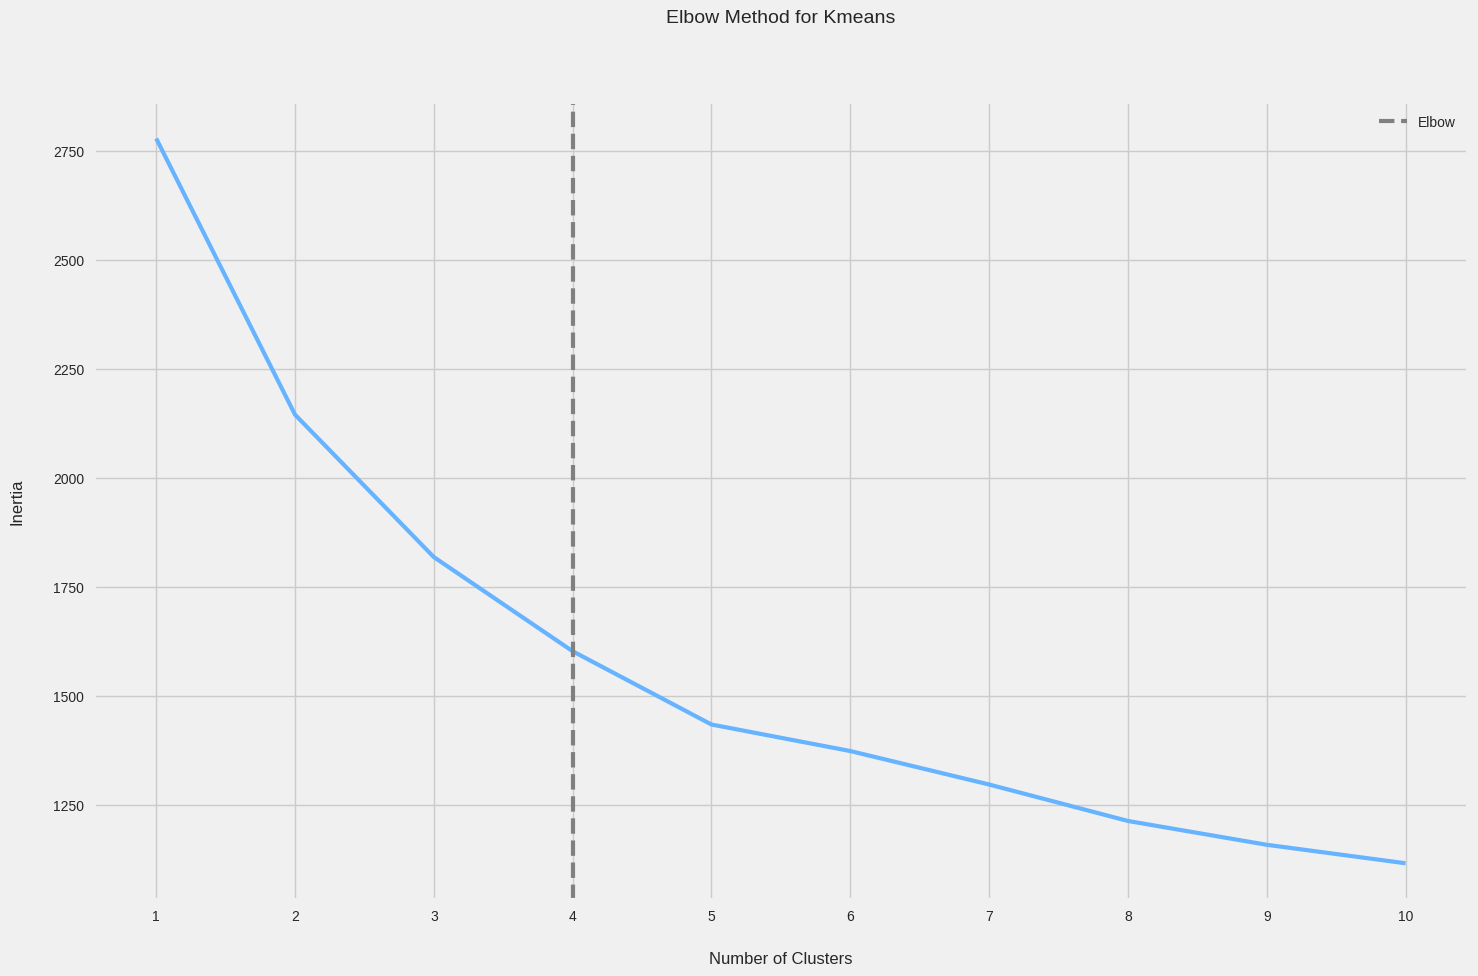

In [62]:
# Implement elbow_optimizer function for KMeans
elbow_optimizer(inertia_values, 'Kmeans')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

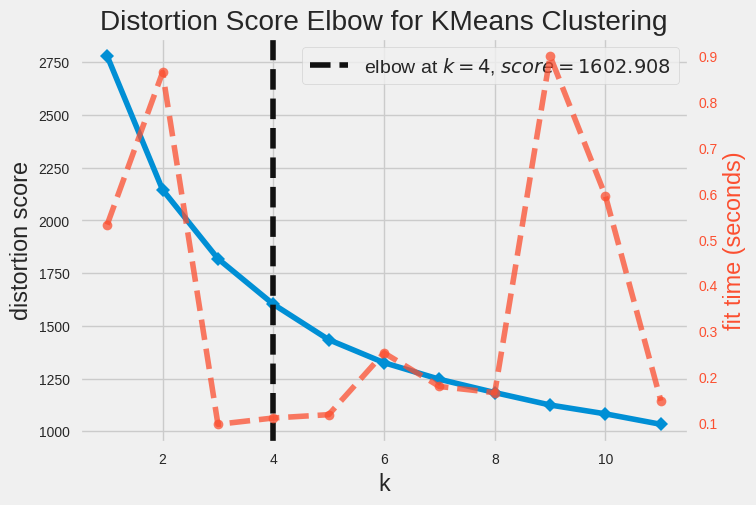

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
# Initialize a list to store the values of the within-cluster sum of squares (WCSS)
wcss = []

# Fit KMeans clustering for different values of k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10,random_state=42)
    kmeans.fit(x_pca_df)
    wcss.append(kmeans.inertia_)  # inertia_ returns the WCSS value for the model

from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,12)).fit(x_pca_df)
visualizer.show()

In [65]:
# Normalize the numerical variables---------------------PCA data ----------------------
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(pf)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4,n_init=10, random_state=42)
df['P_Segment'] = kmeans.fit_predict(segmentation_data_scaled)

print ("Inertia:",kmeans.inertia_)

print(Counter(kmeans.labels_))

# Predict cluster labels
labels = kmeans.labels_

# Evaluate clustering quality
silhouette_PCA = silhouette_score(pf, labels)
davies_bouldin_PCA= davies_bouldin_score(pf, labels)

print(f"Silhouette Score: {silhouette_PCA}")
print(f"Davies-Bouldin Index: {davies_bouldin_PCA}")

Inertia: 7786.609811185134
Counter({2: 462, 3: 461, 0: 337, 1: 193})
Silhouette Score: 0.2131056668596486
Davies-Bouldin Index: 1.8653284643430887


In [90]:
# Normalize the numerical variables
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(x_pca_df)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4,n_init=10, random_state=42)
df['X_Segment'] = kmeans.fit_predict(segmentation_data_scaled)

print ("Inertia:",kmeans.inertia_)

print(Counter(kmeans.labels_))

# Predict cluster labels
labels = kmeans.labels_

# Evaluate clustering quality
silhouette_x = silhouette_score(pf, labels)
davies_bouldin_x= davies_bouldin_score(pf, labels)

print(f"Silhouette Score: {silhouette_x}")
print(f"Davies-Bouldin Index: {davies_bouldin_x}")

Inertia: 10373.97122335569
Counter({2: 569, 0: 426, 1: 285, 3: 173})
Silhouette Score: 0.24945317837070127
Davies-Bouldin Index: 1.488720253734229


<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">

**Inertia:** It measures how tightly the clusters are packed around their centroids. Lower inertia indicates denser clusters.

**Cluster Sizes:** Ideally, we want clusters of approximately equal size, unless there's a specific reason for imbalanced sizes.

**Silhouette Score:** It measures how similar an object is to its own cluster compared to other clusters. Higher silhouette score indicates better-defined clusters.

**Davies-Bouldin Index:** It measures the average "similarity" between each cluster and its most similar cluster. Lower values indicate better separation between cluster.

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">

**Preprocessed Data:**

Inertia: 10373.97

Silhouette Score: 0.249

Davies-Bouldin Index: 1.489

**PCA Data:**

Inertia: 7786.61

Silhouette Score: 0.213

Davies-Bouldin Index: 1.865

Based on these metrics:

1.  Preprocessed data has higher inertia, which indicates less dense clusters.
2.  Preprocessed data has a higher silhouette score, suggesting better-defined clusters.
3.  Preprocessed data has a lower Davies-Bouldin index, indicating better separation between clusters.

Considering these factors, preprocessed data appears to perform better in terms of silhouette score and Davies-Bouldin index.

In [91]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'Age_Group', 'Segment', 'X_Segment'],
      dtype='object')

In [92]:
df.drop(['P_Segment','X_Segment'],axis=1,inplace=True)

In [69]:
# Normalize the numerical variables
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(pf)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(segmentation_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [70]:
x['Segment'] = kmeans.fit_predict(segmentation_data_scaled)

# Evaluate segments
segment_summary = x.groupby('Segment').mean()

# Display segment characteristics
print(segment_summary)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


            yummy  convenient     spicy  fattening    greasy      fast  \
Segment                                                                  
0        0.183976    0.741840  0.115727        1.0  0.830861  0.839763   
1        0.663212    0.880829  0.124352        0.0  0.119171  0.865285   
2        0.651515    0.965368  0.095238        1.0  1.000000  0.924242   
3        0.676790    0.982646  0.062907        1.0  0.000000  0.934924   

            cheap     tasty  expensive   healthy  disgusting    Gender  \
Segment                                                                  
0        0.495549  0.272997   0.528190  0.068249    1.000000  0.510386   
1        0.632124  0.751295   0.248705  0.544041    0.082902  0.533679   
2        0.612554  0.738095   0.348485  0.142857    0.000000  0.419913   
3        0.646421  0.776573   0.288503  0.206074    0.000000  0.425163   

         VisitFrequency  
Segment                  
0              2.626113  
1              2.611399  
2     

In [71]:
#To see each cluster size
Counter(kmeans.labels_)

Counter({3: 461, 2: 462, 0: 337, 1: 193})

In [72]:
print (kmeans.inertia_)

7786.609811185134


In [73]:
print(kmeans.n_iter_)

9


In [74]:
print(kmeans.cluster_centers_)

[[ 1.18079888 -0.36147814 -0.25231601  0.56198005 -0.99616409 -0.3517059
  -0.07558238 -0.12922463]
 [-0.66222813  0.15586575  1.22423069  1.06288403  0.18639509  0.94925318
   0.84144589 -1.220838  ]
 [-0.03992267  0.07331546 -0.94473822 -0.15891819  0.85724067  0.26479785
  -0.02141811  0.06806059]
 [-0.54593258  0.12551909  0.61870506 -0.6965373  -0.20892006 -0.40567805
  -0.27555885  0.53736756]]


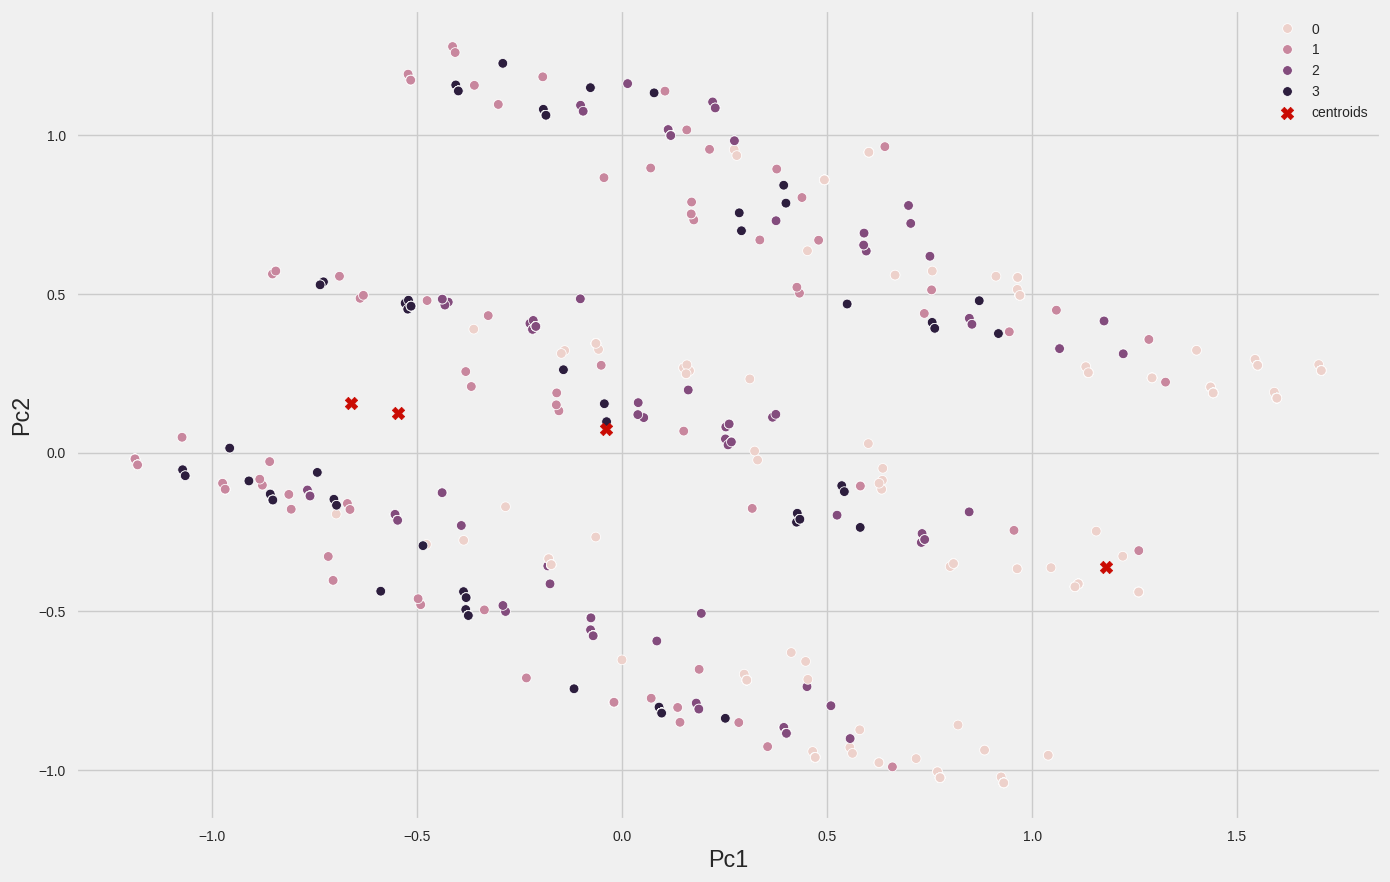

In [75]:
sns.scatterplot(data=pf, x="Pc1", y="Pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

<a id="1"></a>
# <p style="padding:15px;background-color:#90EE90;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">6. Segment Interpretation:</p>

In [76]:
#like vs segment
crosstab =pd.crosstab(df['Segment'],df['Like'])
crosstab

Like,+1,+2,+3,+4,+5,-1,-2,-3,-4,-5,0
Segment,,,,,,,,,,,
0,20,13,13,6,8,15,26,34,45,122,35
1,15,22,35,35,39,5,4,9,2,11,16
2,58,78,76,54,47,24,22,18,13,12,60
3,59,74,105,65,49,14,7,12,11,7,58


In [77]:
#gender vs segment
crosstab_g =pd.crosstab(df['Segment'],df['Gender'])
crosstab_g
#0- F
#1- M

Gender,Female,Male
Segment,,
0,165,172
1,90,103
2,268,194
3,265,196


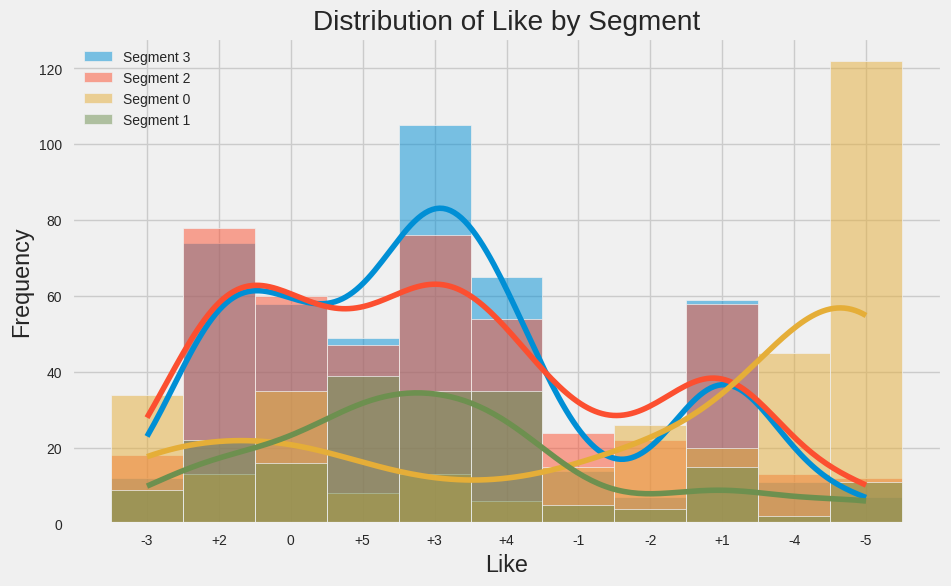

In [78]:
# Histograms
plt.figure(figsize=(10, 6))
for segment in df['Segment'].unique():
    sns.histplot(df[df['Segment'] == segment]['Like'], label=f'Segment {segment}', alpha=0.5, kde=True)
plt.title('Distribution of Like by Segment')
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.legend()
plt.show()

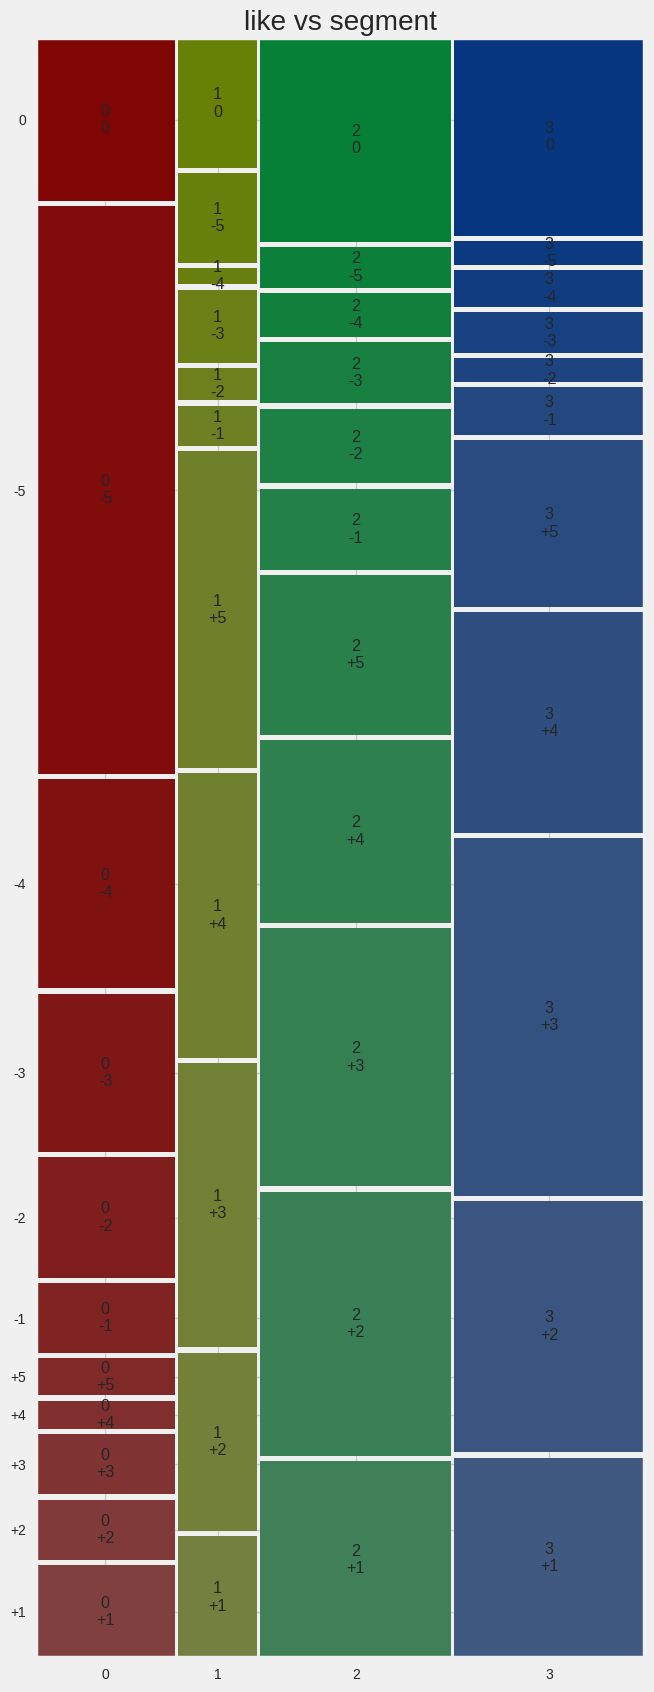

In [79]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,20)
mosaic(crosstab.stack())
plt.title('like vs segment')
plt.show()

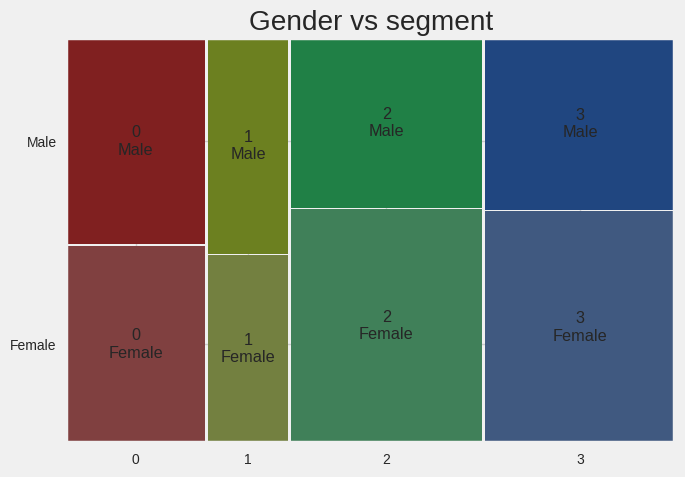

In [80]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_g.stack())
plt.title('Gender vs segment')
plt.show()

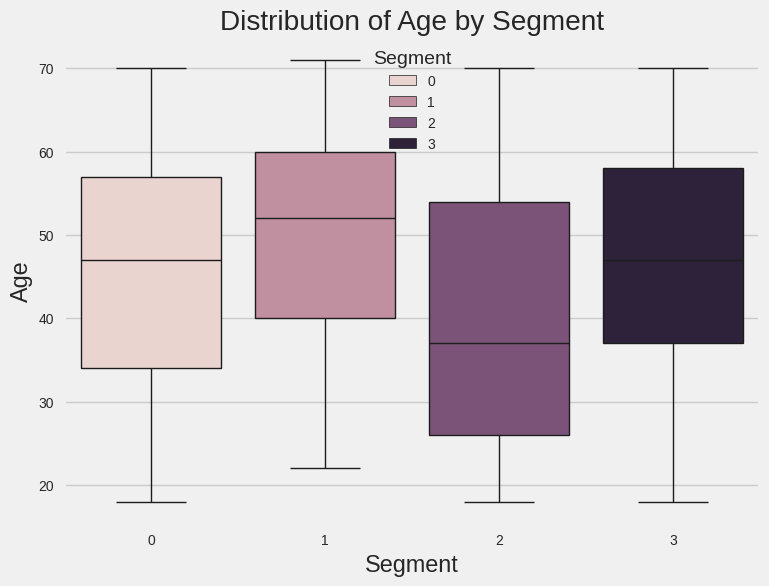

In [81]:
# Plot segment-wise distributions for numeric variables
numeric_vars = ['Age']  # Example numeric variables
for var in numeric_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Segment', y=var, data=df,hue="Segment")
    plt.title(f'Distribution of {var} by Segment')
    plt.xlabel('Segment')
    plt.ylabel(var)
    plt.show()

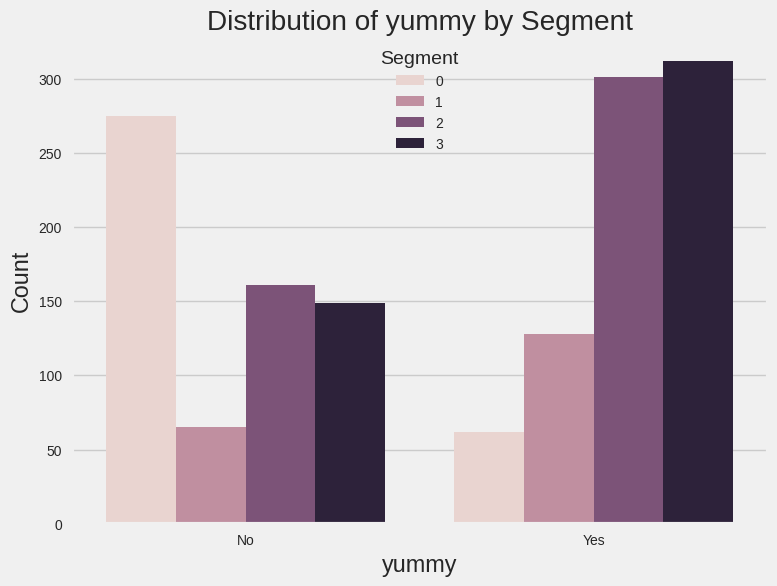

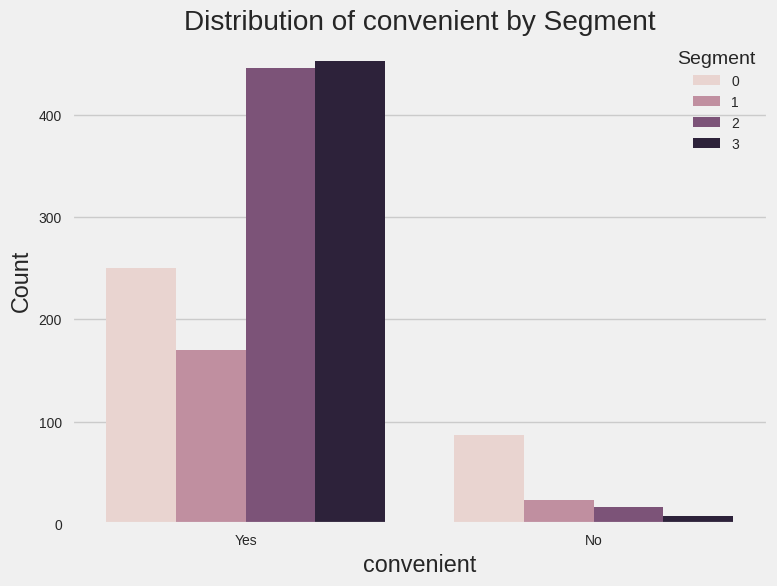

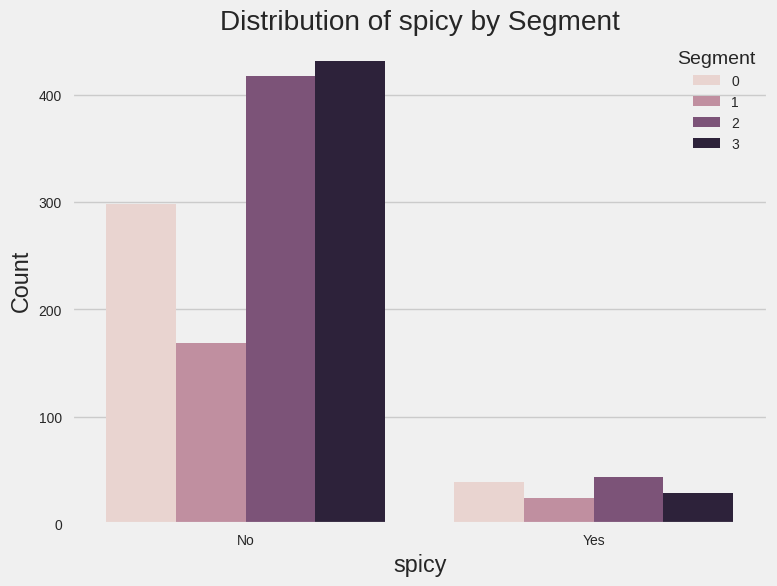

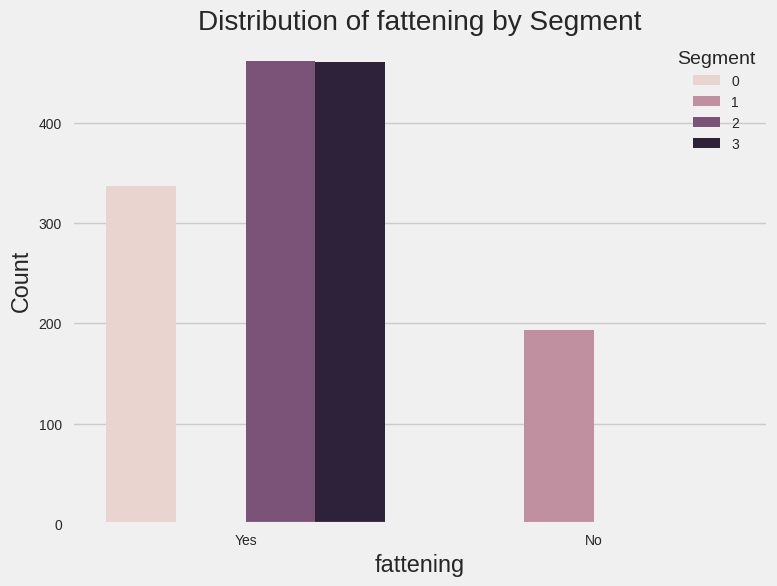

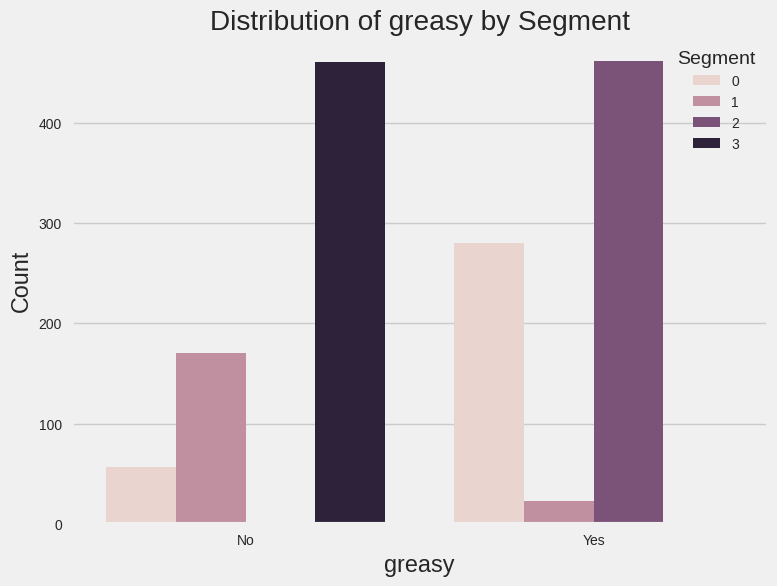

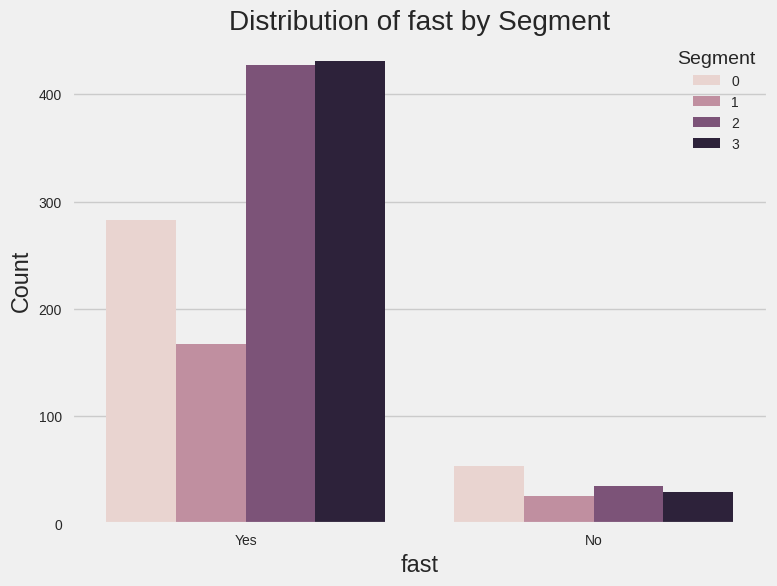

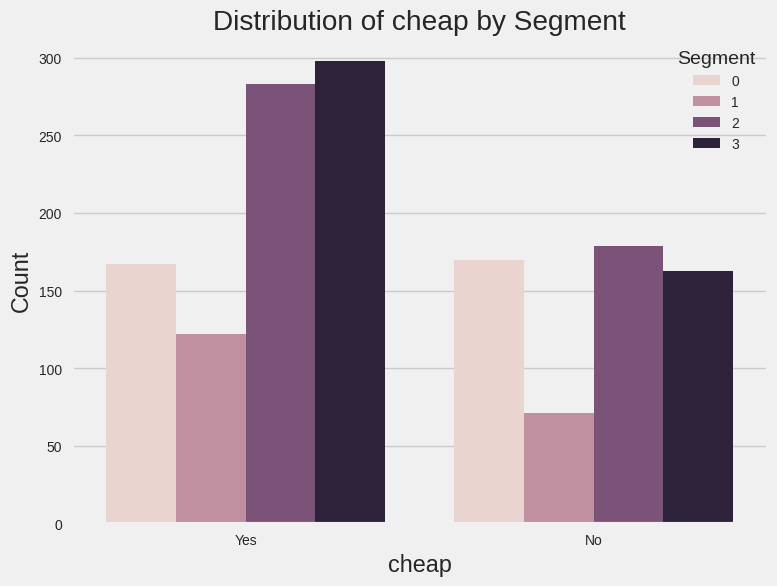

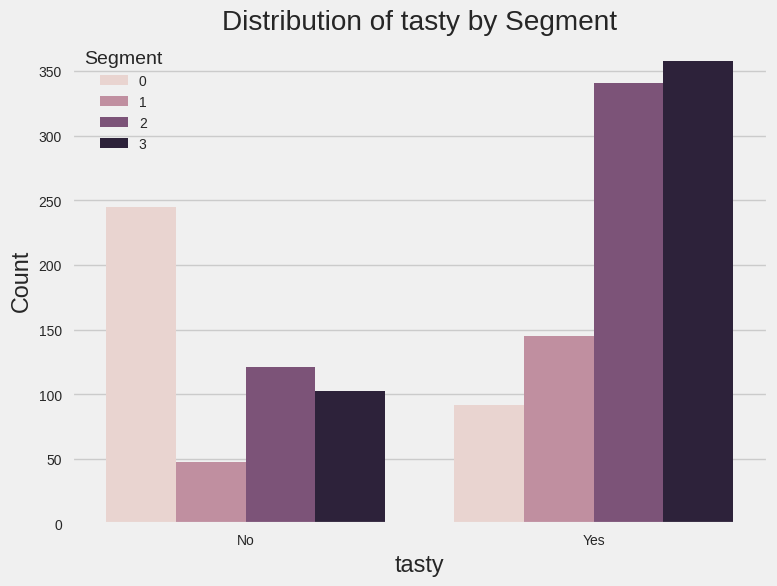

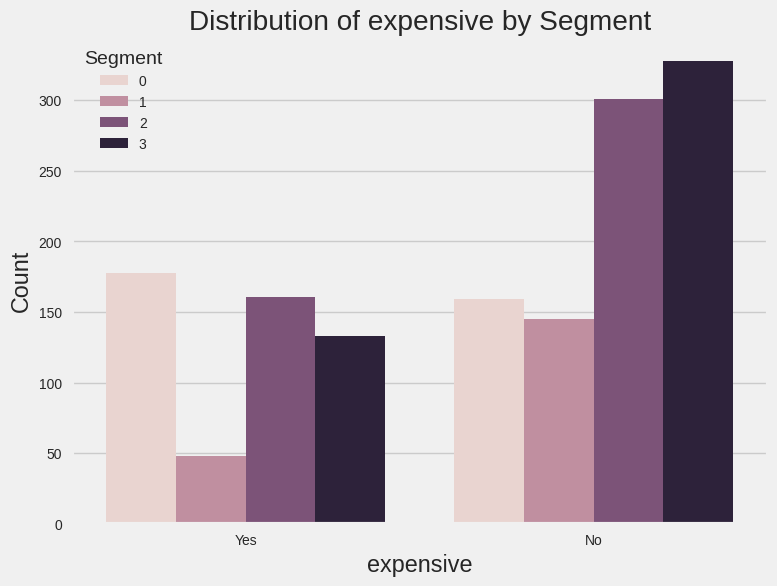

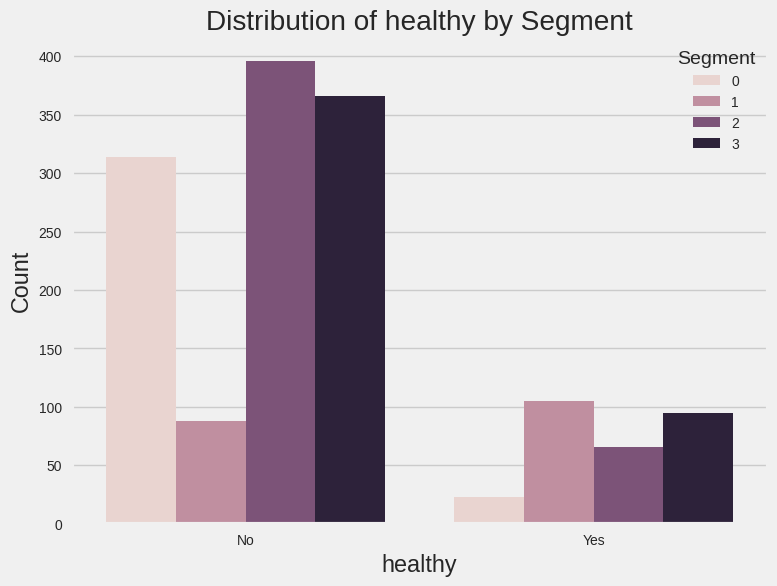

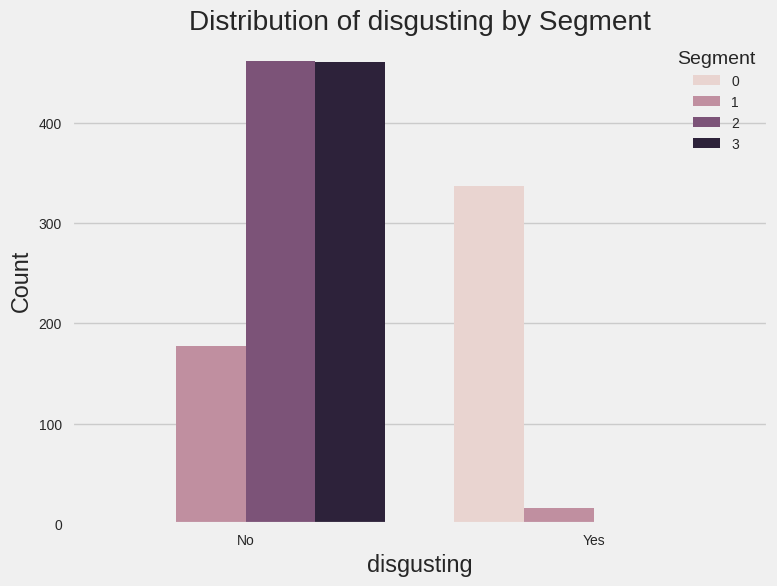

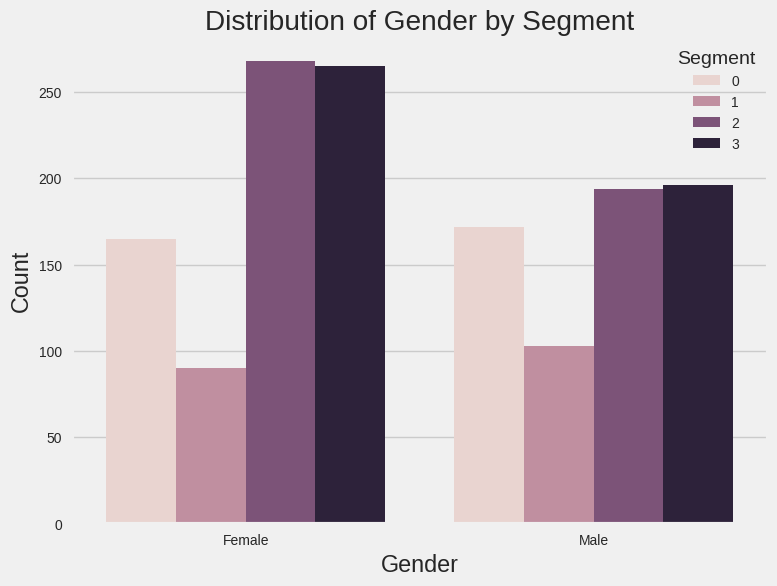

In [82]:
# Plot segment-wise distributions for categorical variables
categorical_vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Gender']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, hue='Segment', data=df)
    plt.title(f'Distribution of {var} by Segment')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Segment')
    plt.show()

In [83]:
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('Segment')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,Segment,VisitFrequency
0,0,2.626113
1,1,2.611399
2,2,2.683983
3,3,2.611714


In [84]:
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('Segment')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,Segment,Like
0,0,7.020772
1,1,3.834197
2,2,3.831169
3,3,3.475054


In [85]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('Segment')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,Segment,Gender
0,0,0.510386
1,1,0.533679
2,2,0.419913
3,3,0.425163


In [86]:
segment = Gender.merge(Like, on='Segment', how='left').merge(visit, on='Segment', how='left')
segment

,Segment,Gender,Like,VisitFrequency
0,0,0.510386,7.020772,2.626113
1,1,0.533679,3.834197,2.611399
2,2,0.419913,3.831169,2.683983
3,3,0.425163,3.475054,2.611714


**Segment 0:**

Gender: 51% male.

Like: high liking score of approximately 7.02 out of 10.

VisitFrequency: Average visit frequency of approximately 2.63 visits.

**Segment 1:**

Gender: 53% male.

Like: Average liking score of approximately 3.83 out of 10.

VisitFrequency: Average visit frequency of approximately 2.61 visits.

**Segment 2:**

Gender: 42% male.

Like: Average liking score of approximately 3.83 out of 10.

VisitFrequency: Average visit frequency of approximately 2.68 visits.

**Segment 3:**

Gender: 43% male.

Like: Average liking score of approximately 3.48 out of 10.

VisitFrequency: Average visit frequency of approximately 2.61 visits.

Based on these characteristics:

Segment 0 appears to be the segment with the highest average liking score and visit frequency, indicating that individuals in this segment have a strong liking for the product or service and tend to visit more frequently.

Segment 1 and Segment 2 have similar average liking scores but slightly different visit frequencies. Segment 1 has a slightly higher visit frequency compared to Segment 2.

Segment 3 has the lowest average liking score among all segments, suggesting that individuals in this segment might not be as interested in the product or service.

**Cluster 0: Health-Conscious Moderates**

Gender: Balanced representation.
Like: High level of liking
Visit Frequency: Moderate frequency.
Other Features: Moderate preference for convenient, greasy, and fast food. Moderate to low preference for spicy and expensive food. Relatively high disgust for unhealthy food. Moderate age distribution.
Interpretation: This cluster represents individuals who maintain a balanced approach to food choices, showing moderate preferences and behaviors across various dimensions. They prioritize convenience and health to some extent, with a balanced representation of genders.

**Cluster 1: Indulgent Food Enthusiasts**

Gender: Balanced representation.
Like:  Moderate level of liking..
Visit Frequency: Moderate frequency.
Other Features: Strong preference for convenient, greasy, and fast food. Low disgust for unhealthy food. Relatively younger age distribution.
Interpretation: This cluster consists of individuals who indulge in food choices, showing a strong preference for convenient and indulgent options. They have a high liking for food and visit food outlets moderately frequently, with a relatively younger age profile.

**Cluster 2: Health-Conscious Epicureans**

Gender: Slightly skewed towards males.
Like: Moderate to high level of liking.
Visit Frequency: High frequency.
Other Features: Moderate preference for convenient, greasy, and fast food. Moderate disgust for unhealthy food. Relatively high preference for tasty and expensive food. Balanced age distribution.
Interpretation: This cluster represents individuals who prioritize both health and taste in their food choices. They have a higher frequency of food outlet visits and a preference for tasty and expensive food items, with a balanced age distribution.

**Cluster 3: Convenience Seekers**

Gender: Slightly skewed towards females.
Like: Moderate to high level of liking.
Visit Frequency: Moderate frequency.
Other Features: Strong preference for convenient, greasy, and fast food. Relatively low disgust for unhealthy food. Balanced age distribution.
Interpretation: This cluster comprises individuals who prioritize convenience in their food choices. They have a strong preference for convenient and fast food options, with a moderate liking for food overall and a balanced age distribution.